# NLP Visualizations of Macbeth and Romeo and Juliet

Execute the following cell for important imports.

In [1]:
import requests
import matplotlib.pyplot as plt
import nltk

from nltk.tokenize import word_tokenize
from nltk.sentiment import vader
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.stem.porter import PorterStemmer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('opinion_lexicon')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /home/jovyan/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

Execute the following cell to get the text of "Macbeth" and "Romeo and Juliet" from [Project Gutenberg](https://www.gutenberg.org/) 

In [2]:
target_url = "https://www.gutenberg.org/files/1533/1533-0.txt"
response = requests.get(target_url)
macbeth_string = response.text
macbeth_string = macbeth_string.split('*** START OF THE PROJECT GUTENBERG EBOOK MACBETH ***')[1]
macbeth_string = macbeth_string.split('*** END OF THE PROJECT GUTENBERG EBOOK MACBETH ***')[0]
macbeth_string = macbeth_string.lower()

target_url = "https://www.gutenberg.org/files/1513/1513-0.txt"
response = requests.get(target_url)
r_j_string = response.text
r_j_string = r_j_string.split('*** START OF THE PROJECT GUTENBERG EBOOK 1513 ***')[1]
r_j_string = r_j_string.split('*** END OF THE PROJECT GUTENBERG EBOOK 1513 ***')[0]
r_j_scenes = [i.lower() for i in r_j_string.split('SCENE')[1:]]

You now have the following variables:
* `macbeth_string`: this string contains the full text of "Macbeth"
* `r_j_string`: this string contains the full text of "Romeo and Juliet"
* `r_j_scenes`: the text from each scene of "Romeo and Juliet" is included in this Python list, with one scene per list item

Make two new variables:
* a Python list of stopwords
* a variable for using VADER's SentimentIntensityAnalyzer

In [3]:
myStopWords = stopwords.words('english')
sia = vader.SentimentIntensityAnalyzer()

## Macbeth

Make a list of the words in Macbeth by tokenizing `macbeth_string`:

In [4]:
from nltk.tokenize import sent_tokenize

In [5]:
macbeth_sent = sent_tokenize(macbeth_string)

macbeth_words = []
for s in macbeth_sent:
  for w in word_tokenize(s):
    macbeth_words.append(w)

In [6]:
print(macbeth_words)

['cover', 'macbeth', 'by', 'william', 'shakespeare', 'contents', 'act', 'i', 'scene', 'i.', 'an', 'open', 'place', '.', 'scene', 'ii', '.', 'a', 'camp', 'near', 'forres', '.', 'scene', 'iii', '.', 'a', 'heath', '.', 'scene', 'iv', '.', 'forres', '.', 'a', 'room', 'in', 'the', 'palace', '.', 'scene', 'v.', 'inverness', '.', 'a', 'room', 'in', 'macbethâ\x80\x99s', 'castle', '.', 'scene', 'vi', '.', 'the', 'same', '.', 'before', 'the', 'castle', '.', 'scene', 'vii', '.', 'the', 'same', '.', 'a', 'lobby', 'in', 'the', 'castle', '.', 'act', 'ii', 'scene', 'i.', 'inverness', '.', 'court', 'within', 'the', 'castle', '.', 'scene', 'ii', '.', 'the', 'same', '.', 'scene', 'iii', '.', 'the', 'same', '.', 'scene', 'iv', '.', 'the', 'same', '.', 'without', 'the', 'castle', '.', 'act', 'iii', 'scene', 'i.', 'forres', '.', 'a', 'room', 'in', 'the', 'palace', '.', 'scene', 'ii', '.', 'the', 'same', '.', 'another', 'room', 'in', 'the', 'palace', '.', 'scene', 'iii', '.', 'the', 'same', '.', 'a', 'park'

Next, make a list of positive words and a list of negative words using the `polarity_scores` method of VADER's SentimentIntensityAnalyzer.  To do this:
* Write a for loop that iterates over your Macbeth word list
  * If the compound score of a word is positive, add the word to the positive-word list
  * If the compound score of a word is negative, add the word to the negative-word list
  * If the compound score is 0, the word should not be added to either list

In [7]:
pos_word = []
neg_word = []

for w in macbeth_words:
  score = sia.polarity_scores(w)
  if score['compound'] > 0:
    pos_word.append(w)
  elif score['compound'] < 0:
    neg_word.append(w)

1. Find the 15 most common negative words in Macbeth and the 15 most common positive words
    * Note that if you have a list variable called `mylist`, you can get the frequencies of words in `mylist` by using `nltk.FreqDist(mylist)`, and you can get the `n` most common words with `nltk.FreqDist(mylist).most_common(n)`.
2. Make a horizontal bar plot similar to the plots in the following image
3. Comment on similarities and differences to the Macbeth plot below

(Plot taken from a [2018 post by Peer Chirstensen](https://web.archive.org/web/20230129014418/https://peerchristensen.netlify.app/post/fair-is-foul-and-foul-is-fair-a-tidytext-entiment-analysis-of-shakespeare-s-tragedies/))

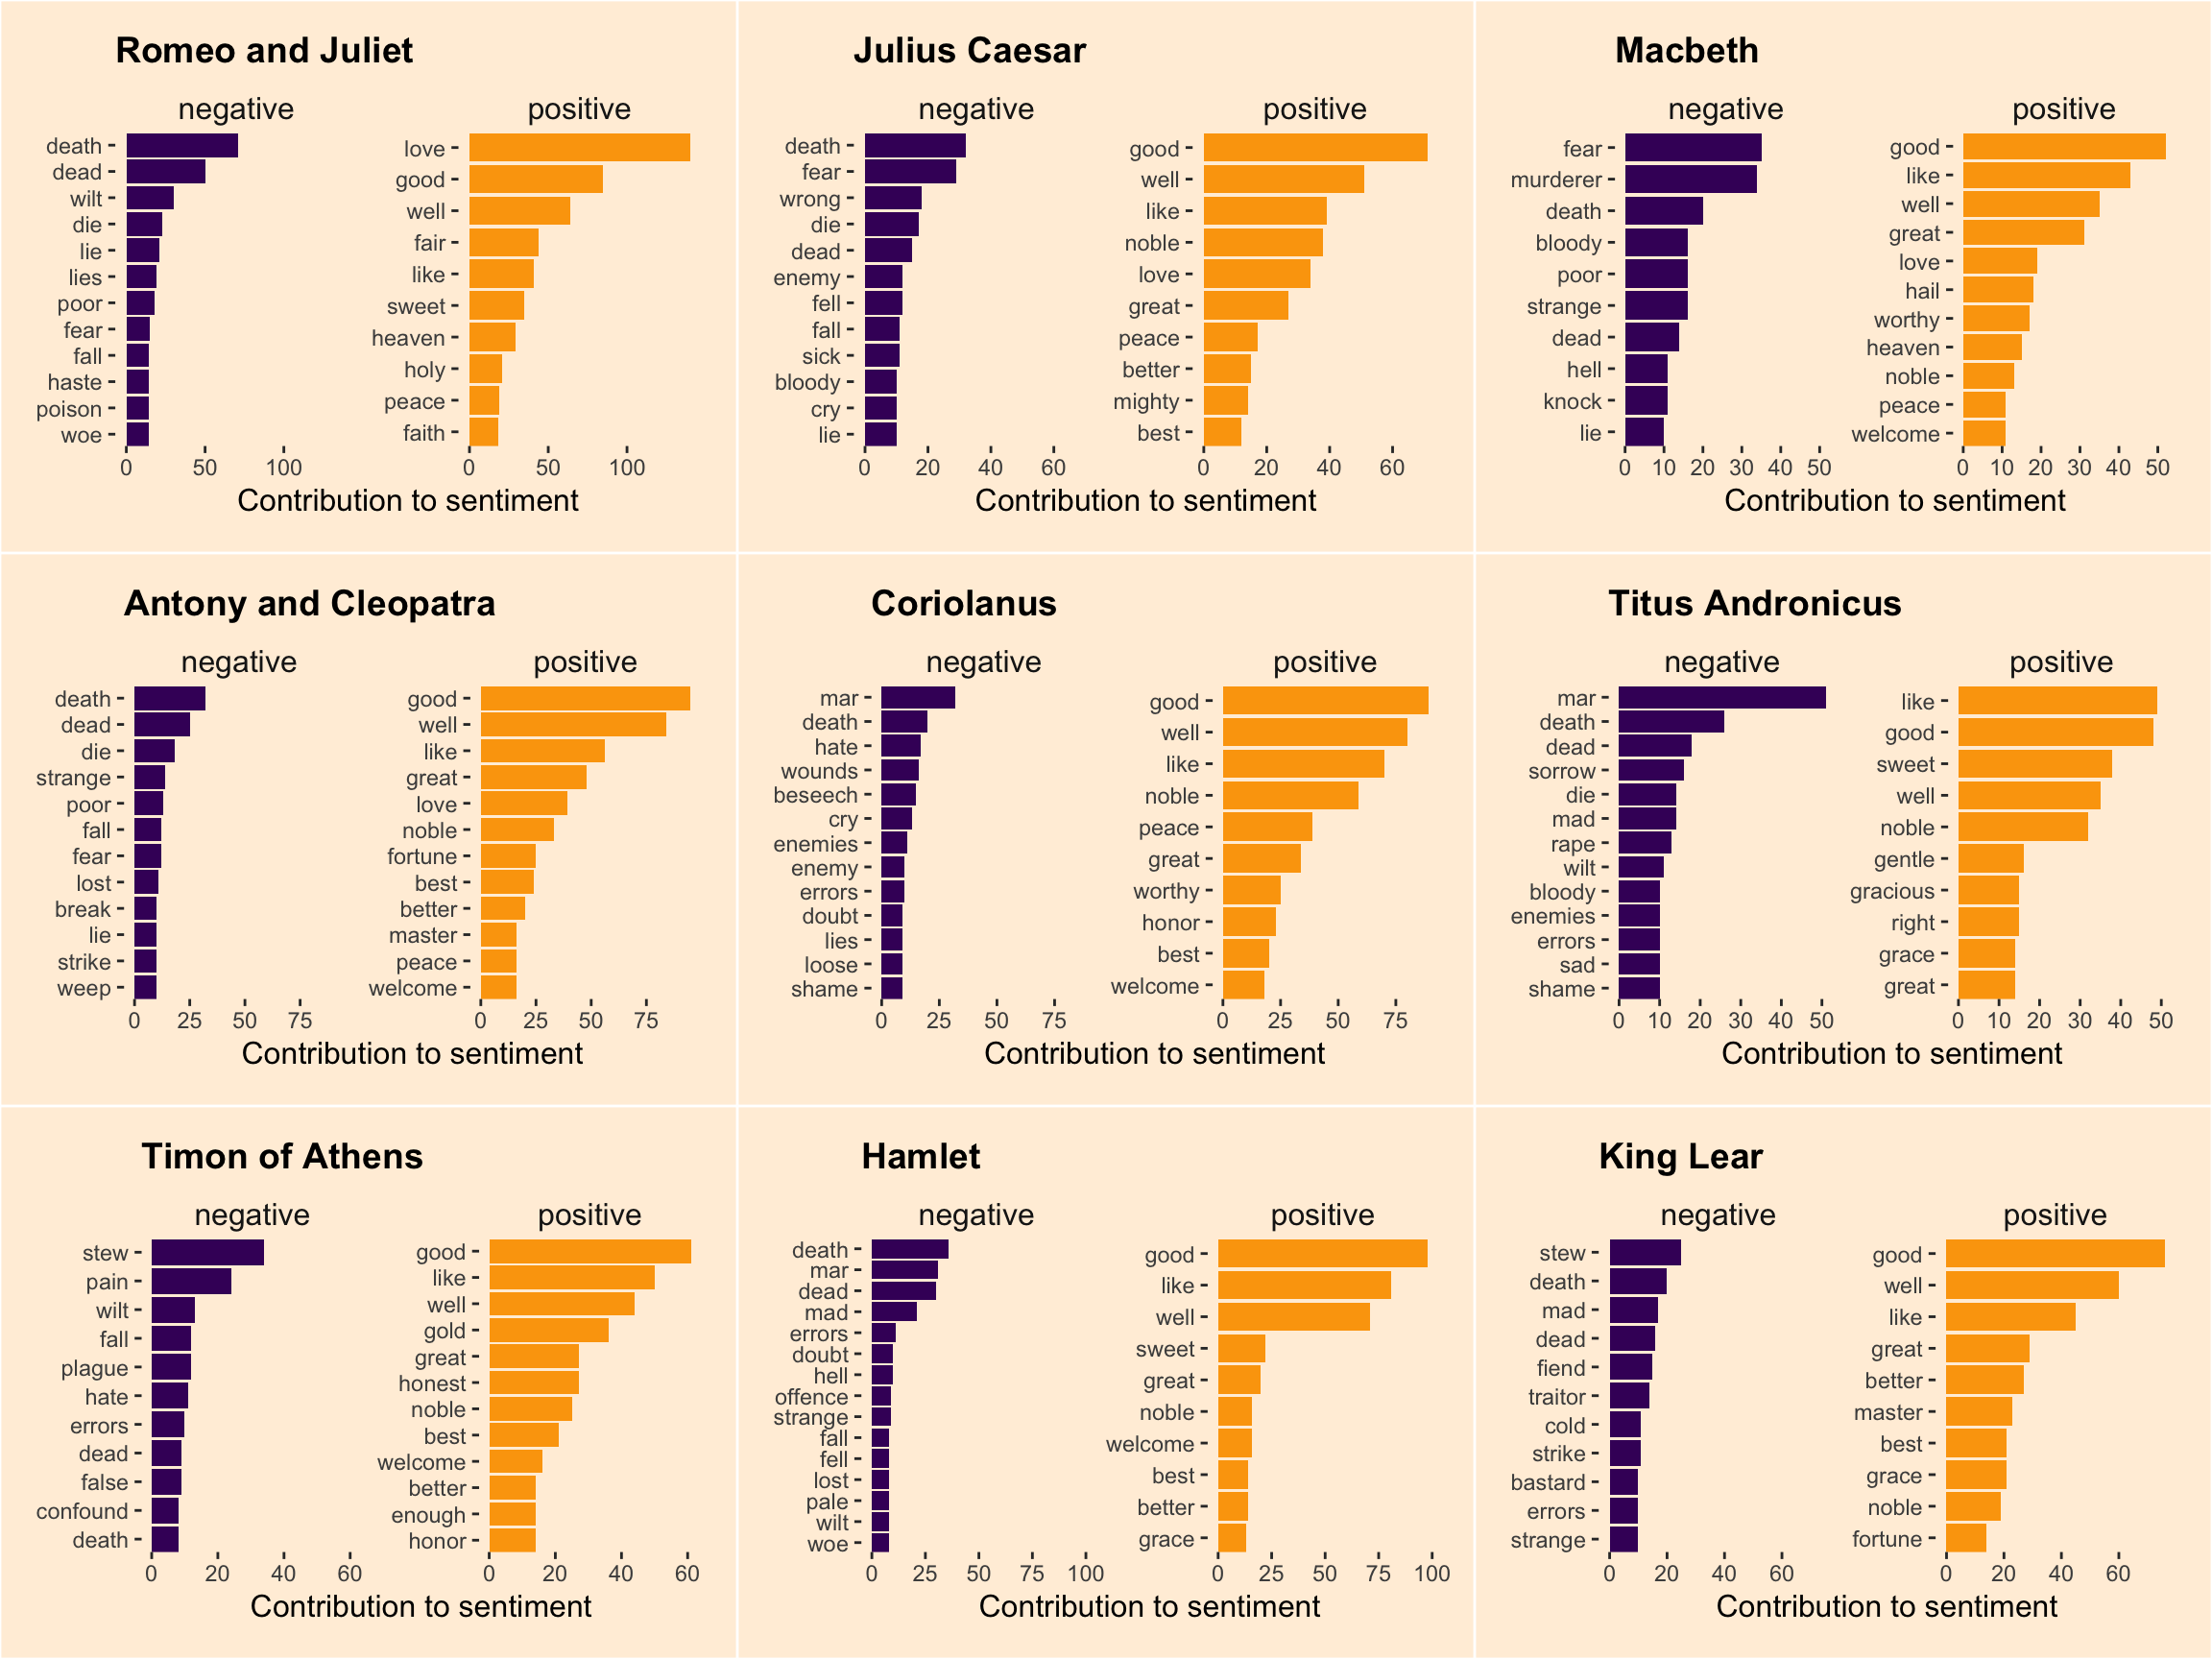

In [8]:
freq_pos = nltk.FreqDist(pos_word).most_common(15)
freq_neg = nltk.FreqDist(neg_word).most_common(15)

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

df_pos = pd.DataFrame(freq_pos, columns = ['Word', 'Frequency'])
df_neg = pd.DataFrame(freq_neg, columns = ['Word', 'Frequency'])

<Axes: title={'center': 'Negative'}, ylabel='Word'>

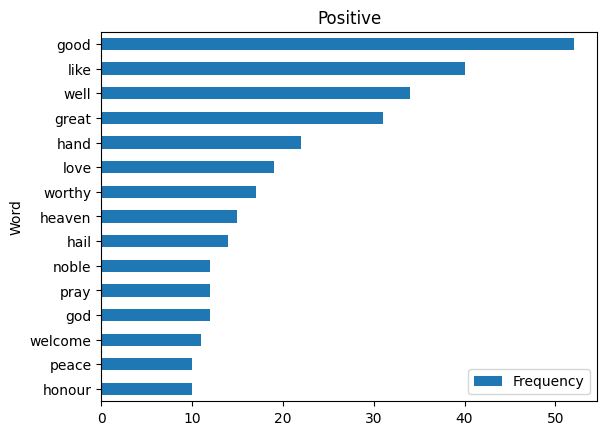

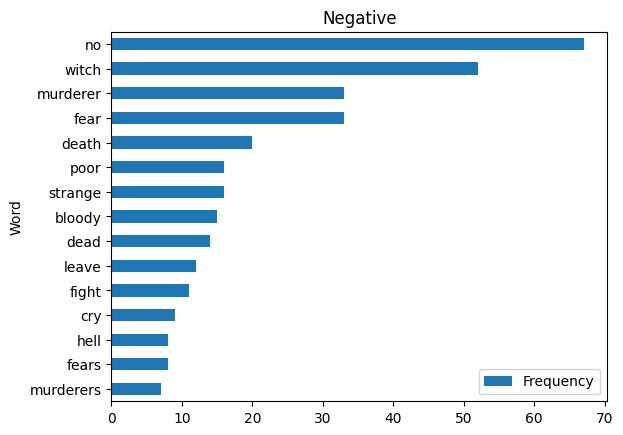

In [10]:
df_pos.sort_values(by='Frequency', ascending=True).plot.barh('Word', 'Frequency', title = 'Positive')
df_neg.sort_values(by='Frequency', ascending=True).plot.barh('Word', 'Frequency', title = 'Negative')

Differences between the two graphs include size, color, and their positioning of graphs. Another difference is how many words are presented. In the graphs I made I included the top 15 words for each categroy while the other graph shows ten and eleven words for negative and positive respectively. The graphs are pretty similar in ranking with the exception of a few words like "no" and "hand." 

The word list we created from Macbeth did not have the stopwords removed.
* Repeat the above analysis, but do so for a list of Macbeth words in which the stopwords have been removed.
* What changes?

In [11]:
from string import punctuation

In [12]:
myStopWords = myStopWords + list(punctuation)

In [13]:
macbeth_noStopWords = []

for i in macbeth_words:
  if i not in myStopWords:
    macbeth_noStopWords.append(i)

In [14]:
pos_noStopWords = []
neg_noStopWords = []

for w in macbeth_noStopWords:
  score = sia.polarity_scores(w)
  if score['compound'] > 0:
    pos_noStopWords.append(w)
  elif score['compound'] < 0:
    neg_noStopWords.append(w)

<Axes: title={'center': 'Negative'}, ylabel='Word'>

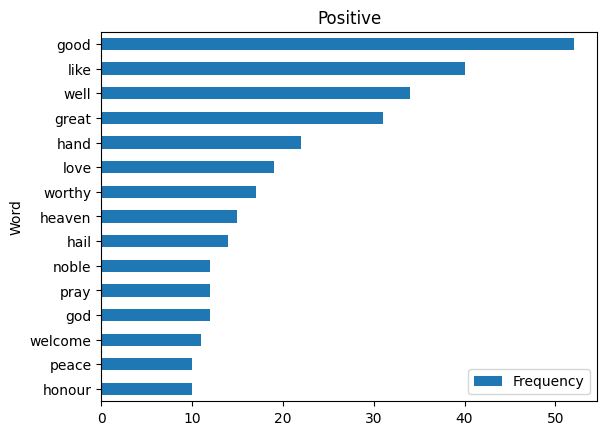

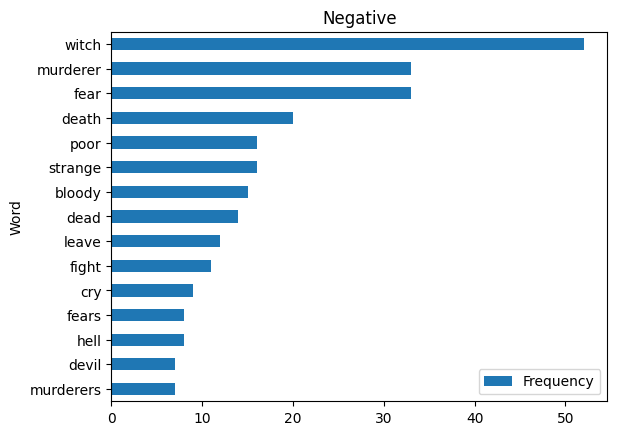

In [15]:
freq_pos_noStopWords = nltk.FreqDist(pos_noStopWords).most_common(15)
freq_neg_noStopWords = nltk.FreqDist(neg_noStopWords).most_common(15)

df_pos_noStopWords = pd.DataFrame(freq_pos_noStopWords, columns = ['Word', 'Frequency'])
df_neg_noStopWords = pd.DataFrame(freq_neg_noStopWords, columns = ['Word', 'Frequency'])

df_pos_noStopWords.sort_values(by='Frequency', ascending=True).plot.barh('Word', 'Frequency', title = 'Positive')
df_neg_noStopWords.sort_values(by='Frequency', ascending=True).plot.barh('Word', 'Frequency', title = 'Negative')

Changes include stop words such as "no" disappearing. Instead we have gained another word from the negative list to replace the space. We got "devil" in the word list.  The positive list is pretty much the same. 

* Repeat the above analysis one more time -> in addition to removing the stopwords, use the Porter stemmer to get a list of stemmed words before you calculate the word frequencies.
* What words in your plot have now been counted together?

<Axes: title={'center': 'Negative'}, ylabel='Word'>

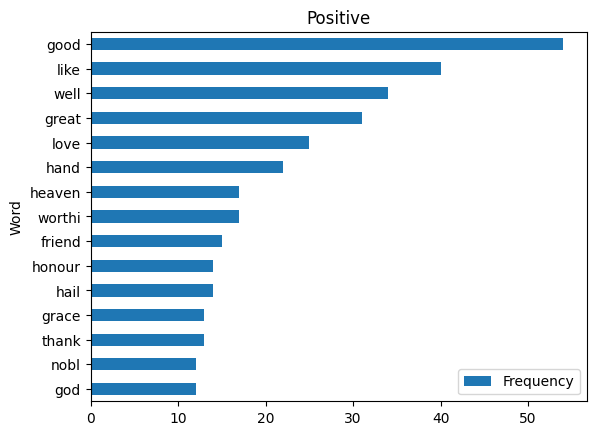

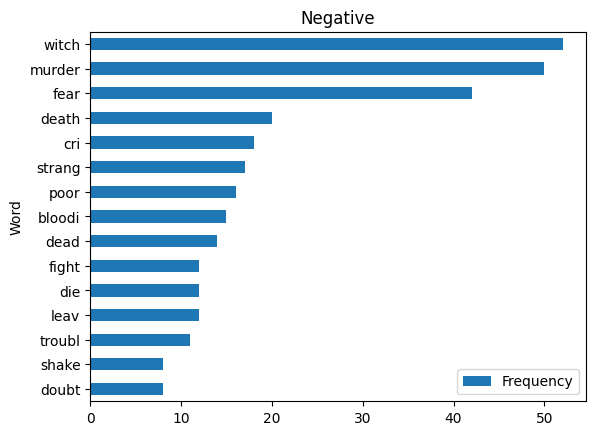

In [16]:
macbeth_noStopWords = []

for i in macbeth_words:
  if i not in myStopWords:
    macbeth_noStopWords.append(i)
    
pos_noStopWords = []
neg_noStopWords = []

for w in macbeth_noStopWords:
  score = sia.polarity_scores(w)
  if score['compound'] > 0:
    pos_noStopWords.append(w)
  elif score['compound'] < 0:
    neg_noStopWords.append(w)
    
pos_wordPorterStems = [PorterStemmer().stem(w) for w in pos_noStopWords]
neg_wordPorterStems = [PorterStemmer().stem(w) for w in neg_noStopWords]

freq_pos_noStopWords = nltk.FreqDist(pos_wordPorterStems).most_common(15)
freq_neg_noStopWords = nltk.FreqDist(neg_wordPorterStems).most_common(15)

df_pos_noStopWords = pd.DataFrame(freq_pos_noStopWords, columns = ['Word', 'Frequency'])
df_neg_noStopWords = pd.DataFrame(freq_neg_noStopWords, columns = ['Word', 'Frequency'])

df_pos_noStopWords.sort_values(by='Frequency', ascending=True).plot.barh('Word', 'Frequency', title = 'Positive')
df_neg_noStopWords.sort_values(by='Frequency', ascending=True).plot.barh('Word', 'Frequency', title = 'Negative')

The porter stemmer has erased a lot of the words and reduced them down to their stem word. We can see a lot more variation in adjectives/nouns. 

## Romeo and Juliet

We are now going to plot the evolution of sentiment in Romeo and Juliet.

This is motivated by the following plot (also from the afore-mentioned link):

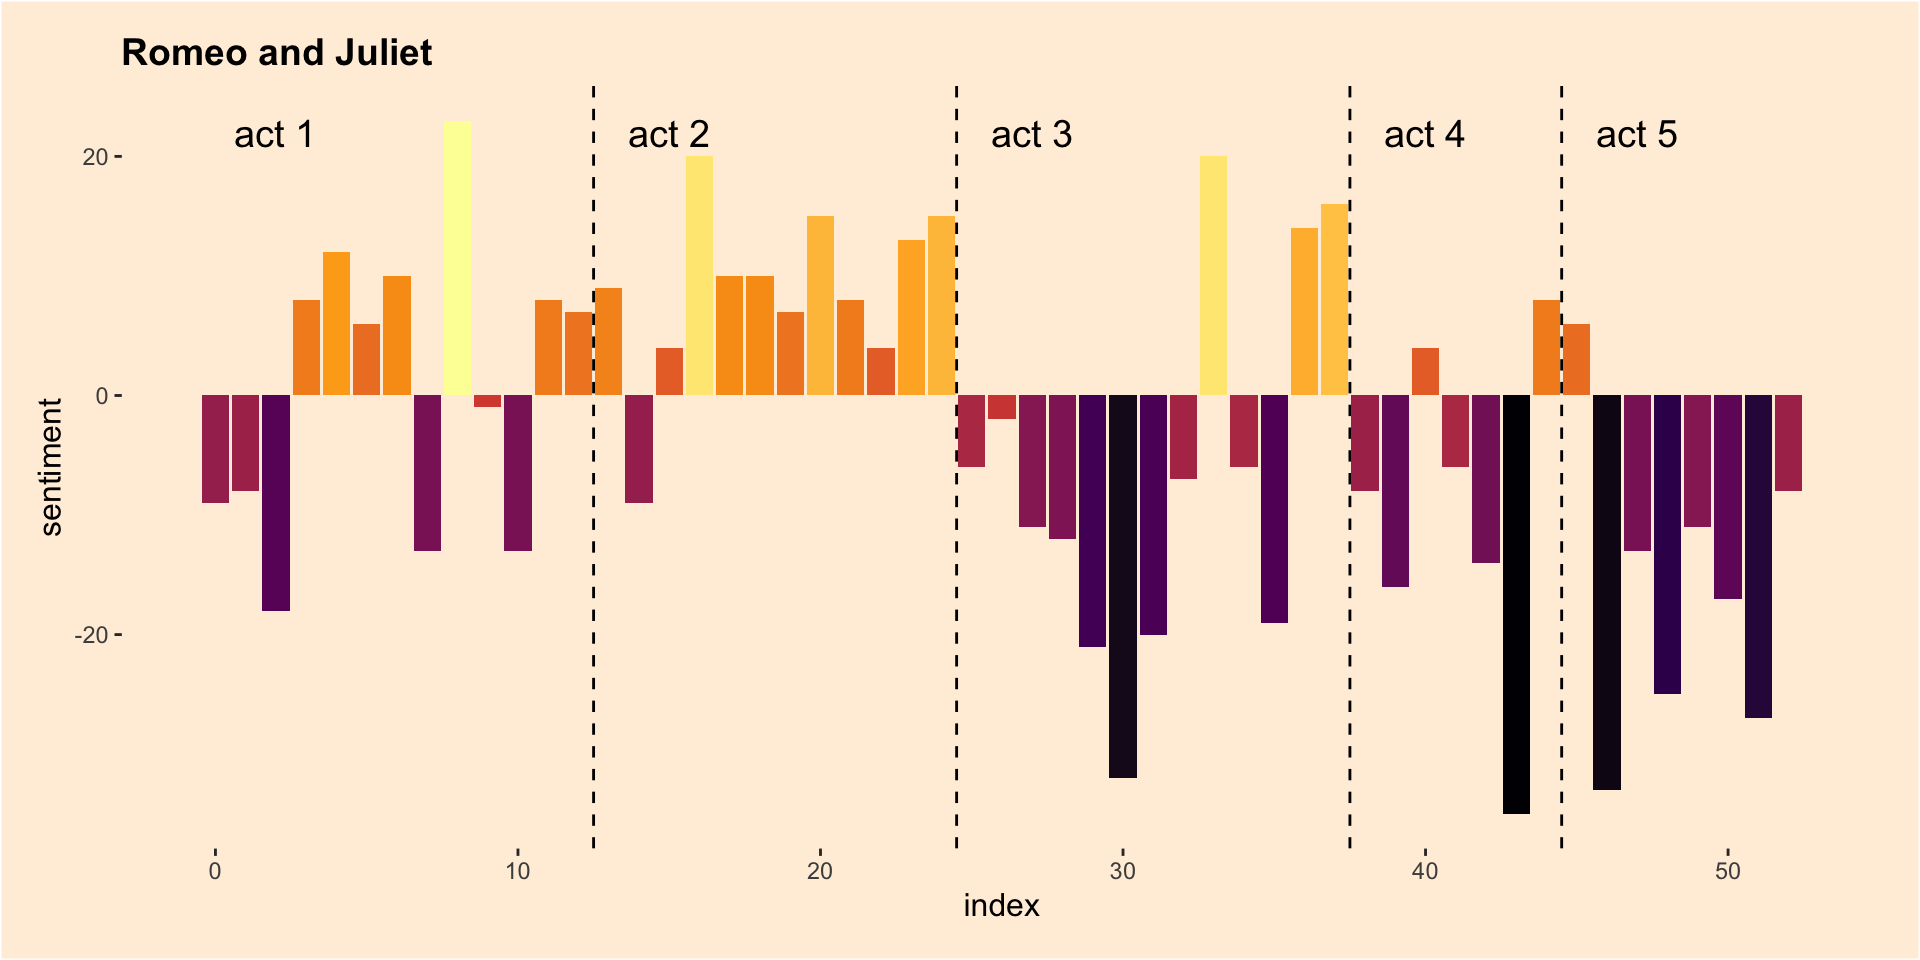

We are going to make a couple different plots.

First:
* Write a for loop that iterates over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Sum the compound sentiment scores of every word in the scene (using VADER's SentimentIntensityAnalyser's polarity_scores method to get the compound sentiment score for each word).
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Comment on its resemblance to the Romeo and Juliet plot above.

Text(0, 0.5, 'Sentiment')

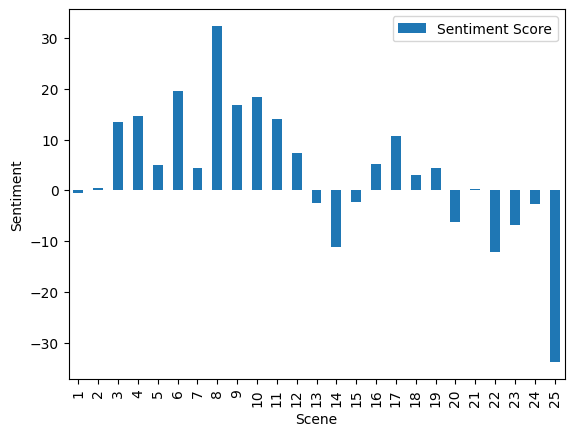

In [17]:
r_j_words = []
compound_score_scenes = []

for scene in r_j_scenes:
  compound_score_scene = 0
  r_j_sent = sent_tokenize(scene)
  for s in r_j_sent:
    for w in word_tokenize(s):
      r_j_words.append(w)
      score = sia.polarity_scores(w)
      compound_score = score['compound']
      compound_score_scene += compound_score
  compound_score_scenes.append(compound_score_scene)

df = pd.DataFrame({'Scene': list(range(1,len(r_j_scenes)+1)), 'Sentiment Score': compound_score_scenes})

df.plot.bar(x = 'Scene', y = 'Sentiment Score')
plt.ylabel('Sentiment')

In comparison to the graph above, the current graph is much smaller and less colorful. In addition the scale to which it measures has less variation. The graph above does not measure by scene but instead by some index within the 5 acts of the play, whereas the current graph measure by scene. However, they are similar in how they present the data. 

Second:
* Write a for loop that iterates over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Calculate the total scene sentiment score by **adding 1 to the score for each positive word (compound_score > 0) and substracting 1 from the score for each negative word (compound_score < 0)**
    * This total is the difference between the positive and negative word counts
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous method of calculating the total scene sentiment score?

In [18]:
r_j_words = []
total_scene_sentiment = []

for scene in r_j_scenes:
  compound_score_scene = 0
  r_j_sent = sent_tokenize(scene)
  for s in r_j_sent:
    for w in word_tokenize(s):
      r_j_words.append(w)
      score = sia.polarity_scores(w)
      compound_score = score['compound']
      if compound_score > 0:
        compound_score_scene += 1
      elif compound_score < 0:
        compound_score_scene -= 1
  total_scene_sentiment.append(compound_score_scene)

Text(0, 0.5, 'Sentiment')

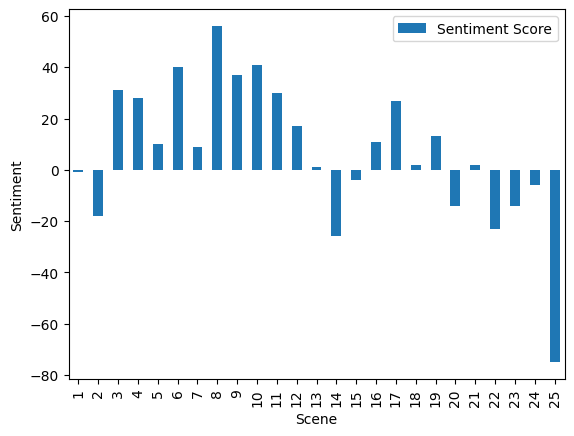

In [19]:
df = pd.DataFrame({'Scene': list(range(1,len(r_j_scenes)+1)), 'Sentiment Score': total_scene_sentiment})

df.plot.bar(x = 'Scene', y = 'Sentiment Score')
plt.ylabel('Sentiment')

Yes, this does change the graph a bit. For example, the second scene is rated much lower on the sentiment level in the second graph than in the first graph. This is because we are calculating the differences in words and not their actual sentiment level. 

Next, we are going to use a new lexicon to assess positive and negative word sentiment, the opinion_lexicon (https://www.nltk.org/api/nltk.corpus.reader.opinion_lexicon.html)

Execute the following cell to make a set of positive words and a set of negative words.

In [20]:
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

The following cell is an example of checking whether a word is positive or negative according to this opinion lexicon.  Try it out with a couple words.

In [21]:
testword = 'love'
if testword in positive_words:
    print(testword + ' is positive')
elif testword in negative_words:
    print(testword + ' is negative')
else:
    print(testword + ' is neither positive nor negative')

love is positive


Third plot:

* Write a for loop that iterates over the scenes in Romeo and Juliet (`r_j_scenes`), and for each scene:
  * Make a list of the scene's words by tokenizing the string
  * Calculate the total scene sentiment score by **adding 1 for each positive word and substracting 1 for each negative word, where the positive/negative word is assessed by its presence in the `positive_words` and `negative_words` sets.**
    * This total is the difference between the positive and negative word counts
* Make a bar plot that has the scene number on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous plots?

In [22]:
r_j_words = []
total_scene_sentiment = []

for scene in r_j_scenes:
  sentiment_score_scene = 0
  r_j_sent = sent_tokenize(scene)
  for s in r_j_sent:
    for w in word_tokenize(s):
      r_j_words.append(w)
      if w in positive_words:
        sentiment_score_scene += 1
      elif w in negative_words:
        sentiment_score_scene -= 1
  total_scene_sentiment.append(sentiment_score_scene)

Text(0, 0.5, 'Sentiment')

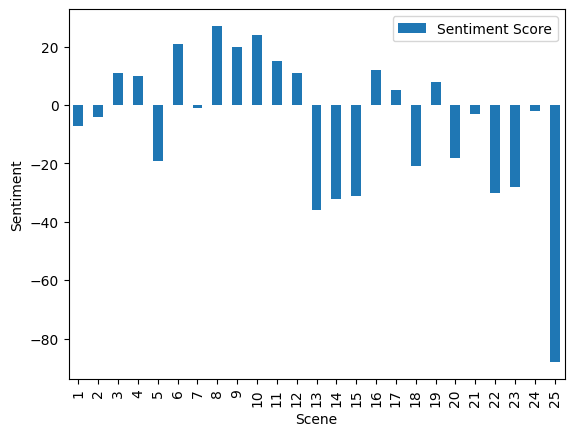

In [23]:
df = pd.DataFrame({'Scene': list(range(1,len(r_j_scenes)+1)), 'Sentiment Score': total_scene_sentiment})

df.plot.bar(x = 'Scene', y = 'Sentiment Score')
plt.ylabel('Sentiment')

Yes, the plot changes. Overall, words in the scene are rated less positive. 

Fourth plot:

* Take the entire string of Romeo and Juliet (`r_j_string`) and tokenize it into words.
* Calculate a total sentiment score for each consecutive group of 500 words.
  * Do this as immediately above by adding 1 for each positive word and substracting 1 for each negative word, where the positive/negative word is assessed by its presence in the `positive_words` and `negative_words` sets.
* Make a bar plot that has the group number (0,1,2,3,...) on the horizontal axis and the sentiment scores as the bar heights.
* Does this change the plot relative to the previous plots?

In [24]:
r_j_sent = sent_tokenize(r_j_string)

r_j_words = []
for s in r_j_sent:
  for w in word_tokenize(s):
    r_j_words.append(w)

total_sentiment_score = []
for i in range(0, len(r_j_words), 500):
  sentiment_score = 0
  group = r_j_words[i:i+500]
  
  for w in group:
    if w in positive_words:
      sentiment_score += 1
    elif w in negative_words:
      sentiment_score -= 1
  
  total_sentiment_score.append(sentiment_score)

Text(0, 0.5, 'Sentiment')

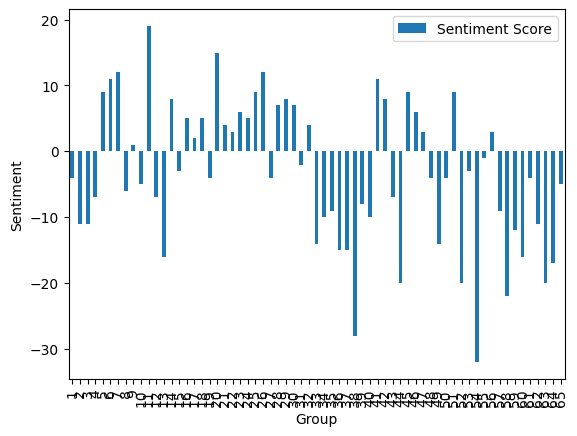

In [25]:
df = pd.DataFrame({'Group': list(range(1,len(total_sentiment_score)+1)), 'Sentiment Score': total_sentiment_score})

df.plot.bar(x = 'Group', y = 'Sentiment Score')
plt.ylabel('Sentiment')

Yes, it does change. This graph has much more change in variation compared to the other graphs. This is probably due to having more chunks/groupings than the other graphs. 

What method would you use if you had to report on the evolution of sentiment in Romeo and Juliet to an audience of Shakespearian academics?

If I had to report on the evolution of sentiment in Romeo and Juliet, I would probably use groupings of scenes with the compound score. I think the scenes are more relevant and better walkthrough the beats of each story point. And the compound score gives more variation on a scale than just plain "positive" and "negative."